## 7.1 라이프사이클 메서드의 이해
- 컴포넌트의 수명은 페이지에 렌더링되기 전인 준비과정에서 시작하여 페이지에서 사라질 때 끝난다.
- 라이프 사이클 메서드 종류는 총 아홉가지
    - will 접두사가 붙은 메서드는 작동하기 전에 실행되는 메서드
    - did 접두사가 붙은 메서드는 작업을 작동한 후에 실행되는 메서드
    - 마운트, 업데이트, 언마운트 카테고리로 나눈다.

- 마운트
    - DOM이 생성되고 웹 브라우저상에 나타나는 것을 마운트라고 함
    - constructor : 컴포넌트를 새로 만들 때마다 호출되는 클래스 생성자 메서드
    - getDerivedStateFromProps : props에 있는 값은 state에 넣을 때 사용하는 메서드
    - render : UI를 렌더링하는 메서드
    - componentDidMount : 컴포넌트가 웹 브라우저상에 나타난 후 호출하는 메서드

- 업데이트
    - 컴포넌트는 네 가지 경우에 업데이트 된다
    1. props가 바뀔 때
    2. state가 바뀔 때
    3. 부모 컴포넌트가 리렌더링될 때
    4. this.forceUpdate로 강제로 렌더링을 트리거할 때
    - getDerivedStateFromProps : 마운트 과정에서도 호출되며, 업데이트가 시작하기 전에도 호출된다. props의 변화에 따라 state 값에도 변활르 주고 싶을 때 사용
    - shouldComponentUpdate : 컴포넌트가 리렌더링을 해야 할지 말아야 할지를 결정하는 메서드 true / false 값을 반환
    - render : 컴포넌트를 리렌더링
    - getSnapshotBeforeUpdate : 컴포넌트 변화를 DOM에 반영하기 직전에 호출하는 메서드
    - componentDidUpdate : 컴포넌트의 업데이트 작업이 끝난 후 호출하는 메서드

- 언마운트
    - 컴포넌트를 DOM에서 제거하는 것
    - componentWillUnmount : 컴포넌트가 웹 브라우저상에서 사라지기 전에 호출하는 메서드


## 7.2 라이프사이클 메서드 살펴보기
- render() 함수
    - 컴포넌트 모양새를 정의
    - 라이프사이클 메서드 중 **유일한 필수 메서드**
    - this.props와 this.state에 접근할 수 있으며 리액트 요소를 반환한다
    - 이벤트 설정이 아닌 곳에서 setState를 사용하면 안됨, DOM에 접근해서도 안됨

- constructor 메서드
    - 컴포넌트의 생성자 메서드로 컴포넌트를 만들 때 처음으로 실행
    - 초기 state를 정할 수 있다.
        ```js
        constructor(props) { ... }
        ```

- getDerivedStateFromProps 메서드
    - props로 받아 온 값을 state에 동기화시키는 용도로 사용
    - 컴포넌트가 마운트 될 때와 업데이트 될 때 호출
        ```js
        static  getDerivedStateFromProps(nextProps, prevState) {
            if(nextProps.value !== prevState.value) { // 조건에 따라 특정 값 동기화
                return { value: nextProps.value }
            }
            return null // state를 변경할 필요가 없다면 null을 반환
        }
        ```

- componentDidMount 메서드
    - 컴포넌트를 만들고, 첫 렌더링을 다 마친 후 실행
    - 이 안에서 다른 자바스크립트 라이브러리 또는 프레임워크의 함수를 호출하거나 이벤트 등록, setTimeout, setInterval, 네트워크 요청 같은 비동기 작업을 처리
        ```js
        componentDidMount() { ... }
        ```

- shouldComponentUpdate 메서드
    - props 또는 state를 변경했을 때, 리렌더링을 시작할지 여부를 지정하는 메서드
    - 반드시 true / false 값을 반환
    - 메서드를 따로 생성하지 않으면 기본적으로 언제나 true 값을 반환

- getSnapshotBeforeUpdate 메서드
    - render에서 만들어진 결과물이 브라우저에 실제로 반영되기 직전에 호출됨
    - 반환 값은 componentDidUpdate에서 세 번째 파라미터인 snapshot 값으로 전달 받을 수 있다
    - 주로 업데이트하기 직전의 값을 참고할 일이 있을 때 활용(ex. 스크롤바 위치 유지)
        ```js
        getSnapshotBeforeUpdate(prevProps, prevState) {
            if(prevState.array !== this.state.array) {
                const { scrollTop, scrollHeight } = this.list
                return {scrollTop, scrollHeight }
            }
        }
        ```

- componentDidUpdate 메서드
    - 리렌더링을 완료한 후 실행
    - 업데이트가 끝난 직후이므로 DOM 관련 처리를  해도 무방
    - prevProps, prevState를 사용하여 컴포넌트가 이전에 가졌던 데이터에 접근할 수 있음
    - getSnapshotBeforeUpdate에서 반환한 값이 있다면 snapshot 값을 전달 받을 수 있다
        ```js
        componentDidUpdate(prevProps, prevState, snapshot) { ... }
        ```
    
- componentWillUnmount 메서드
    - 컴포넌트를 DOM에서 제거할 때 실행, componentDidMount에서 등록한 이벤트, 타이머, 직접 생성한 DOM을 여기서 제거
        ```js
        componentWillUnmount() { ... }
        ```
    
- componentDidCatch 메서드
    - 컴포넌트 렌더링 도중에 에러가 발생했을 때 애플리케이션이 먹통이 되지 않고 오류 UI를 보여줄 수 있게 함
    - 자신에게 발생하는 에러를 잡아낼 수 없고 자신의 this.props.children으로 전달되는 컴포넌트에서 발생하는 에러만 잡아낼 수 있다.
        ```js
        componentDidCatch(error, info) {
            this.setState({
                error:true
            })
            console.log({error, info})
        }
        ```


## 7.3 라이프사이클 메서드 사용하기
```js
import { Component } from 'react';

class LifeCycleSample extends Component {
    state = {
        number: 0,
        color: null
    };

    myRef = null; // ref를 설정할 부분

    constructor(props) {
        super(props);
        console.log('constructor');
    }

    static getDerivedStateFromProps(nextProps, prevState) {
        console.log('getDerivedStateFromProps');
        if (nextProps.color !== prevState.color) {
            return { color: nextProps.color };
        }
        return null;
    }

    componentDidMount() {
        console.log('componentDidMount');
    }
    
    shouldComponentUpdate(nextProps, nextState) {
        console.log('shouldComponentUpdate', nextProps, nextState);
        // 숫자의 마지막 자리가 4면 리렌더링하지 않습니다.
        return nextState.number % 10 !== 4;
    }

    componentWillUnmount() {
        console.log('componentWillUnmount');
    }

    handleClick = () => {
        this.setState({
            number: this.state.number + 1
        });
    };

    getSnapshotBeforeUpdate(prevProps, prevState) {
        console.log('getSnapshotBeforeUpdate');
        if (prevProps.color !== this.props.color) {
            return this.myRef.style.color;
        }
        return null;
    }

    componentDidUpdate(prevProps, prevState, snapshot) {
        console.log('componentDidUpdate', prevProps, prevState);
        if (snapshot) {
            console.log('업데이트되기 직전 색상: ', snapshot);
        }
    }

    render() {
        console.log('render');

        const style = {
            color: this.props.color
        };

        return (
            <div>
                {/* {this.props.missing.value} */}
                <h1 style={style} ref={ref => (this.myRef = ref)}>
                    {this.state.number}
                </h1>
                <p>color: {this.state.color}</p>
                <button onClick={this.handleClick}>
                    더하기
                </button>
            </div>
        );
    }
}
export default LifeCycleSample;
```
- 각 라이프사이클 메서드를 실행할 때마다 콘솔 디버거에 기록, 부모 컴포넌트에서 props로 색상을 받아 버튼을 누르면 state.number 값을 1씩 더한다.

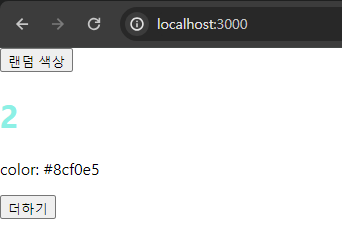

```js
import { Component } from 'react';

class ErrorBoundary extends Component {
    state = {
        error: false
    };

    componentDidCatch(error, info) {
        this.setState({
            error: true
        });
        console.log({ error, info });
    }

    render() {
        if (this.state.error) return <div>에러가 발생했습니다!</div>;
        return this.props.children;
    }
}

export default ErrorBoundary;
```
- 의도적으로 error를 발생시키고 위 컴포넌트로 연동시키면 

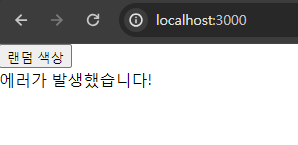



## 7.4 정리
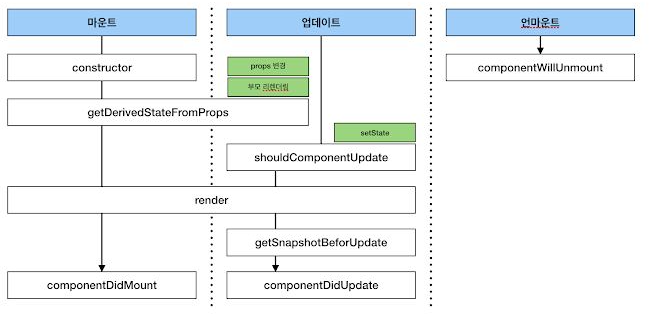

- 라이프사이클 메서드는 컴포넌트 상태에 변화가 있을 때마다 실행하는 메서드
- 서드파티 라이브러리를 사용하거나 DOM을 직접 건드려야 하는 상황에서 유용
